## 1. Preprocess & EDA

### 1.1 Arrtribute information:

The dataset consists of 10 numerical and 8 categorical attributes.The 'Revenue' attribute can be used as the class label."Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all page-views to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.


### 1.2 Data Description


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'
df = pd.read_csv(url)

In [62]:
df.replace({'Month':{'Feb':2,'Mar':3,'May':5,'Oct':10,'June':6,'Jul':7,'Aug':8,'Nov':11,'Sep':9,'Dec':12},
           'VisitorType':{'Returning_Visitor':0, 'New_Visitor':1, 'Other':2},
           'Weekend':{False:0,True:1},
           'Revenue':{False:0,True:1}},inplace=True)

In [63]:
df['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [64]:
print('Baseline Accuracy: {0}'.format(df['Revenue'].value_counts()[0]/np.sum(df['Revenue'].value_counts())))

Baseline Accuracy: 0.8452554744525548


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


### Heatmap

<AxesSubplot:>

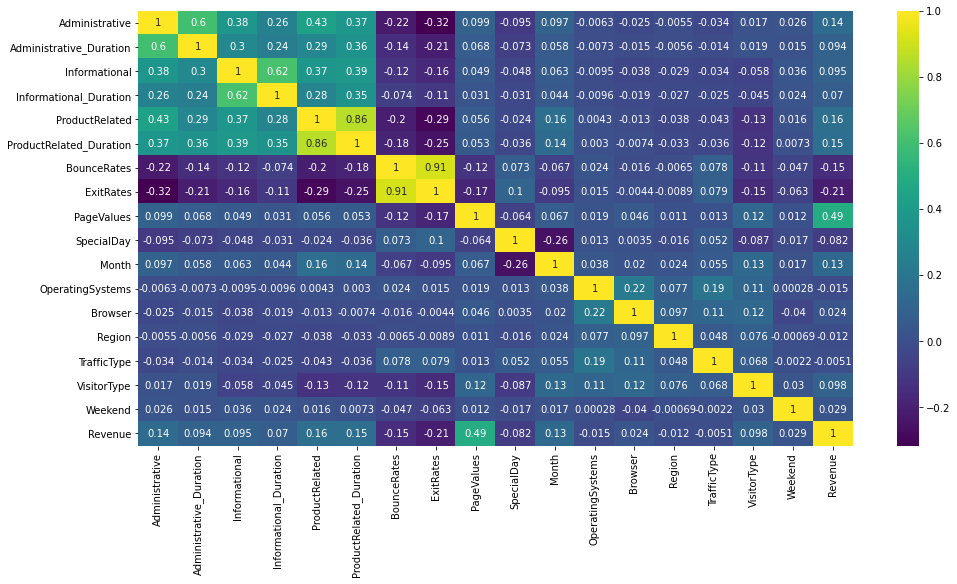

In [67]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

### 1.3 Observation
    From the heatmap of correlation coefficients, we observe that through the heatmap, we can find that "Administrative", "ProductRelated", "ProductRelated_Duration", "PageValues", and "Month" all have a relative strong correlation with "Revenue" (target variable), which indicates that some features could be more useful in classification models.
    

### 2. Univariate Analysis- Numerical Features
#### 2.1.1. Bounce Rate, Exit Rate and Page Value
    The ”Bounce Rate“, ”Exit Rate“ and ”Page Value“ features represent the metrics measured by ”Google Analytics“ for each  page in the e-commerce site. 

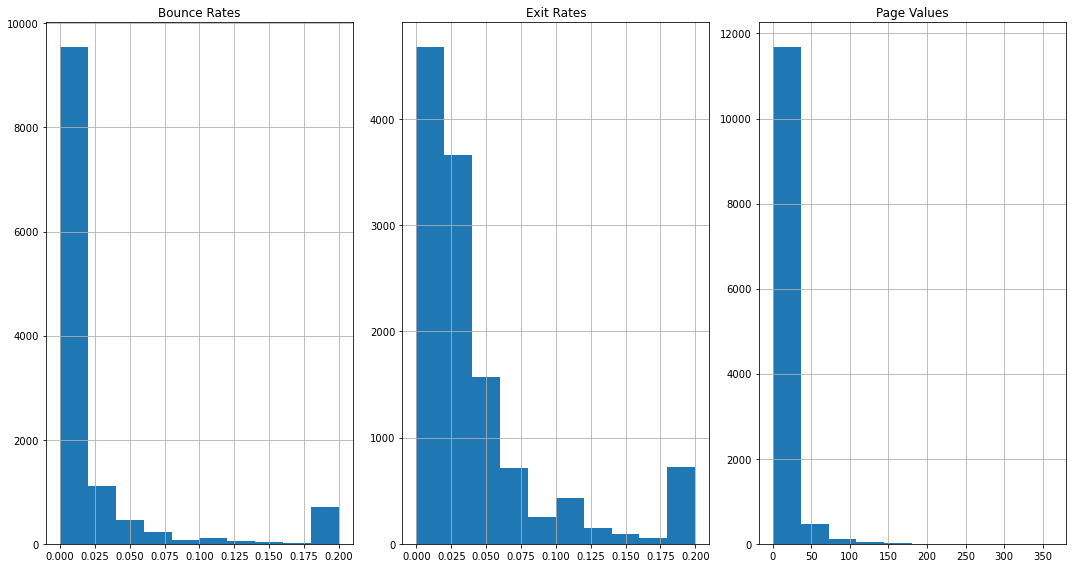

In [68]:
fig, duration = plt.subplots(1,3, figsize = (15,8))

duration[0].hist(df[['BounceRates']])
duration[0].grid(True)
duration[0].set_title('Bounce Rates')

duration[1].hist(df[['ExitRates']])
duration[1].grid(True)
duration[1].set_title('Exit Rates')

duration[2].hist(df[['PageValues']])
duration[2].grid(True)
duration[2].set_title('Page Values')

fig.tight_layout()
plt.show()

Observation:
    1. The Max value of Bounce Rate is 0.2 and minimum value is 0. 
    2. The Max value of Exit Rate is 0.2 and minimum value is 0.
    3. The Max value of Page Value is 361 and minimum value is 0.

### 2. Univariate Analysis - Categorical Features
#### 2.2.1 Operation System
    "OperationSystems" represents operating system of the visitor.

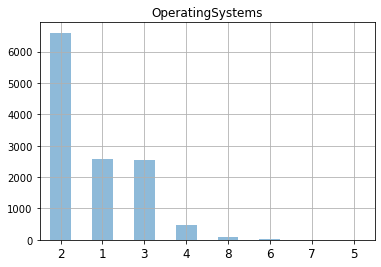

In [69]:
os = df['OperatingSystems'].value_counts()
os.plot.bar(stacked=True, alpha=0.5, grid = True) 
plt.title("OperatingSystems")
plt.xticks(fontsize=12, rotation=0)

plt.show()

    Observation:
    Those who use Type 1 Operating System account most and most  of visitors use Type 1 or Type 2 or Typr 3 Operationg System.

#### 2.2.2 Browser
    "Browser" represents brower of the visitor.

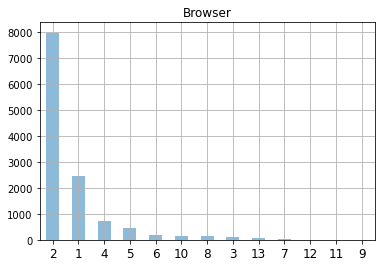

In [70]:
browser = df['Browser'].value_counts()
browser.plot.bar(stacked=True, alpha=0.5, grid = True) 
plt.title("Browser")
plt.xticks(fontsize=12, rotation=0)

plt.show()

    Observation:
    More than a half vivitors use Type 2 browser.
    
#### 2.2.3 Region
    "Region" represents geographic region from which the visitor has arrived at the Web site.(e.g., banner, SMS, direct)

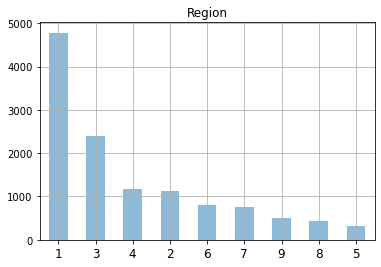

In [71]:
region = df['Region'].value_counts()
region.plot.bar(stacked=True, alpha=0.5, grid = True) 
plt.title("Region")
plt.xticks(fontsize=12, rotation=0)

plt.show()

    Observation: 
    About 38.77% from Region 1 and abour 19.49% visitors from Region 3

#### 2.2.4 Visitor Type
    VisitorType is divided into "New Visitor", "Returning Visitor" and "Other".

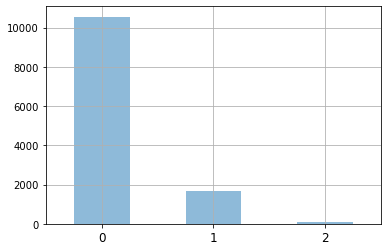

In [72]:
vt = df['VisitorType'].value_counts()
vt.plot.bar(stacked=True, alpha=0.5, grid = True) 
plt.xticks(fontsize=12, rotation=0)
plt.show()

    Observation:
    1. More than 10000 visitors are returning visitors.
    2. Less than 2000 visitors are new visitor or other.

### 3. Bivariate Analysis

#### 3.1 Administrative, Administrative_Duration, and Revenue

<AxesSubplot:xlabel='Administrative_Duration', ylabel='Administrative'>

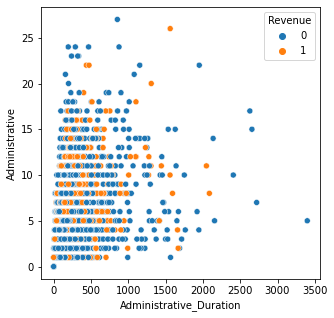

In [73]:
plt.figure(figsize=(5,5))
sns.scatterplot(x = df['Administrative_Duration'],y = df['Administrative'], hue = df['Revenue'])

#### 3.2 Informational, Informational_Duration, and Revenue

/Users/cyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Informational_Duration', ylabel='Informational'>

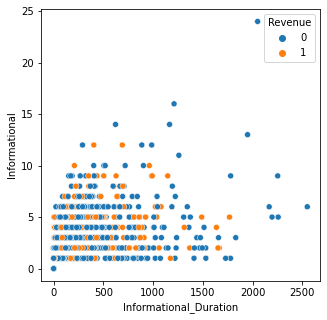

In [74]:
plt.figure(figsize=(5,5))
sns.scatterplot(df['Informational_Duration'],df['Informational'], hue=df['Revenue'])

#### 3.3 ProductRelated, ProductRelated_Duration, and Revenue

/Users/cyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ProductRelated_Duration', ylabel='ProductRelated'>

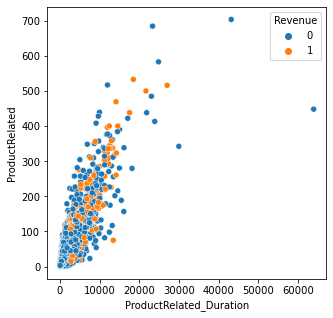

In [75]:
plt.figure(figsize=(5,5))
sns.scatterplot(df['ProductRelated_Duration'],df['ProductRelated'], hue=df['Revenue'])

#### 3.4 BounceRates, ExitRates, and Revenue

/Users/cyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BounceRates', ylabel='ExitRates'>

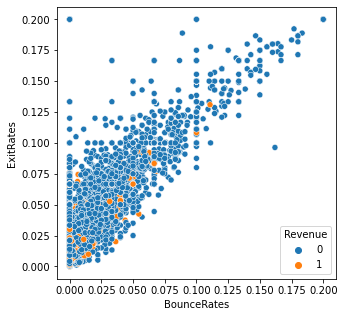

In [76]:
plt.figure(figsize=(5,5))
sns.scatterplot(df['BounceRates'],df['ExitRates'], hue=df['Revenue'])

#### Observation:

We could observe that “ProductRelated” &” ProducRelated_Duration” and “BounceRates” & “ExitRates” all show a strong correlation. But the correlation of “Administrative” & “Administrative_Duration” and “Informational” & “Informational_Duration” are not obvious.

#### 3.5. Month and Revenue

/Users/cyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='count'>

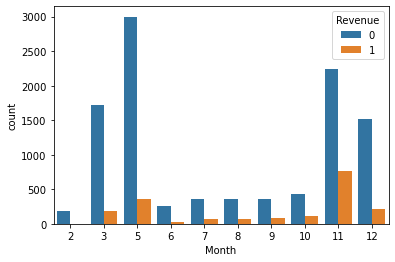

In [77]:
sns.countplot(df['Month'],hue=df['Revenue'])

#### Observation:
The number of people who may not shop in March but will visit the website is the largest. The largest number of customers will shop in November. It may be that the public’s shopping demand has surged because of the holiday. The number of people browsing the website and the number of people spending - both show a similar trend.

## 2. PCA

### 2.1 Standradize

We first use one hot coding to make our categorical variables meaningful. Then standardzie it to apply PCA dimension reduction on it. 

In [21]:
df_pca=df.copy()
column=df_pca.columns[10:-1].tolist()

In [22]:
df_pca=pd.get_dummies(df_pca,columns=column)

In [23]:
df_pca=df_pca.astype(float)

In [24]:
df_pca.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_0,VisitorType_1,VisitorType_2,Weekend_0,Weekend_1
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [25]:
def standardize(x,df):
    return (x-df.mean())/df.std()

In [26]:
df_stpca=df_pca.copy()
for i in range(df_pca.shape[1]):
    df_stpca.iloc[:,i]=df_stpca.iloc[:,i].apply(lambda x: standardize(x,df_stpca.iloc[:,i]))

In [27]:
df_stpca.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_0,VisitorType_1,VisitorType_2,Weekend_0,Weekend_1
0,-0.696965,-0.457173,-0.396462,-0.244921,-0.690975,-0.624322,3.667040,3.229185,-0.317165,-0.308809,...,-0.0156,-0.009006,-0.028489,-0.037156,-0.127746,0.410604,-0.399071,-0.083313,0.550529,-0.550529
1,-0.696965,-0.457173,-0.396462,-0.244921,-0.668491,-0.590879,-0.457664,1.171425,-0.317165,-0.308809,...,-0.0156,-0.009006,-0.028489,-0.037156,-0.127746,0.410604,-0.399071,-0.083313,0.550529,-0.550529
2,-0.696965,-0.457173,-0.396462,-0.244921,-0.690975,-0.624322,3.667040,3.229185,-0.317165,-0.308809,...,-0.0156,-0.009006,-0.028489,-0.037156,-0.127746,0.410604,-0.399071,-0.083313,0.550529,-0.550529
3,-0.696965,-0.457173,-0.396462,-0.244921,-0.668491,-0.622929,0.573512,1.994529,-0.317165,-0.308809,...,-0.0156,-0.009006,-0.028489,-0.037156,-0.127746,0.410604,-0.399071,-0.083313,0.550529,-0.550529
4,-0.696965,-0.457173,-0.396462,-0.244921,-0.488617,-0.296418,-0.045194,0.142545,-0.317165,-0.308809,...,-0.0156,-0.009006,-0.028489,-0.037156,-0.127746,0.410604,-0.399071,-0.083313,-1.816286,1.816286


### 2.2. Choose Principal Components

To choose how many principal components we should take, we use variance ratio to compute how much those principle components account for the ratio. Then we choose 95%, 90%, 80% of it to compare how much it contributes to improving model accuracy. 

In [28]:
cov_matrix=np.cov(df_stpca,rowvar=False)
egnvalues,egnvectors=np.linalg.eigh(cov_matrix)
egnvalues=abs(np.sort(-egnvalues))
variance_ratio=egnvalues/egnvalues.sum()

In [29]:
variance_ratio_95=len(variance_ratio[np.cumsum(variance_ratio)<0.95])
variance_ratio_90=len(variance_ratio[np.cumsum(variance_ratio)<0.9])
variance_ratio_80=len(variance_ratio[np.cumsum(variance_ratio)<0.8])
print('Number of eigen vectors with 95% variance: {}\nNumber of eigen vectors with 90% variance: {}\nNumber of eigen vectors with 80% variance: {}'.format(variance_ratio_95,variance_ratio_90,variance_ratio_80))

Number of eigen vectors with 95% variance: 57
Number of eigen vectors with 90% variance: 52
Number of eigen vectors with 80% variance: 44


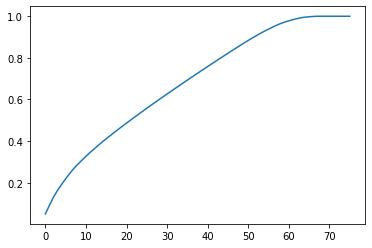

In [30]:
plt.plot(np.cumsum(variance_ratio))

In [31]:
def PCA(pc):
    u,s,vh=np.linalg.svd(df_stpca)
    #S=np.zeros([pc,pc])
    #for i in range(pc):
        #S[i][i]=s[i]
    #df_pca_after=pd.DataFrame(np.dot(u[:,:pc],S))
    df_pca_after=np.matmul(df_stpca,vh[:,:pc])
    df_pca_after['Revenue']=df['Revenue']
    return df_pca_after

In [32]:
df_pca_95=PCA(57)
df_pca_90=PCA(52)
df_pca_80=PCA(44)

In [33]:
pc=57
u,s,vh=np.linalg.svd(df_stpca)
S=np.zeros([pc,pc])
for i in range(pc):
        S[i][i]=s[i]
df_pca_after_2=np.matmul(df_stpca,vh[:,:pc])
df_pca_after_2['Revenue']=df['Revenue']

## 3. Naive Bayes

In [41]:
class NaiveBayes:
    def __init__(self, X, y,smooth=1e-20):
        self.X = X
        self.y = y
        self.smooth=smooth
        
    def trainTestSplit(self):
        train=df.loc[0:8000]
        test=df.loc[8000:]
        self.X_train=train.iloc[:,:-1].values
        self.y_train=train.iloc[:,-1].values
        self.X_test=test.iloc[:,:-1].values
        self.y_test=test.iloc[:,-1].values   
        
    def pdf(self,x):
        pdf=np.exp(-float(x)**2/2)/np.sqrt(2*np.pi)
        return max(pdf,self.smooth)

    def count_num(self,x,X_train):
        n=0
        for bar in X_train:
            if x==bar:
                n+=1 
        return n

    
    def likelihood(self,x,y,X_train,y_train):
        n=self.count_num(x,X_train)
        m=self.count_num(y,y_train)
        #if n==0:
            #laplace=(n+self.laplace)/(m+self.laplace*7)
        #else:
            #laplace=n/m
        return max(self.smooth,n/m)
    def normalize(self,x,df):
        return (x-df.mean())/df.std()
    
    def product(list):
        x=1
        for i in list:
            x*=i
        return x
        
    def probability(self,x,y,prior):
        return prior * x*y
    
    
    def runModel(self):
        self.trainTestSplit()
        
        self.X0_train=self.X_train[self.y_train == 0]
        self.X1_train=self.X_train[self.y_train == 1]
        

        # Calculate priors
        self.prior_y0 =len(self.X0_train)/len(self.X_train)
        self.prior_y1 =len(self.X1_train)/len(self.X_train)
        print('Training:\n')
        self.predict(self.X_train,self.y_train)
        print('Test:\n')
        self.predict(self.X_test,self.y_test)
    
    def predict(self,test1,test2):
        global product_y0,product_y1
        self.FP=0
        self.FN=0
        self.TP=0
        self.TN=0
        for sample, target in zip(test1,test2):
            product_y0=1
            product_y1=1
            for i in range(10):
                product_y0*=self.pdf(self.normalize(sample[i],self.X0_train[:,i]))
                product_y1*=self.pdf(self.normalize(sample[i],self.X1_train[:,i]))

            for i in range(10,self.X_test.shape[1]):
                product_y0*=self.likelihood(sample[i],0,self.X0_train[:,i],self.y_train)
                product_y1*=self.likelihood(sample[i],1,self.X1_train[:,i],self.y_train)
                
            py0=np.log10(self.prior_y0*product_y0)
            py1=np.log10(self.prior_y1*product_y1)
            predict=np.argmax([py0,py1])
            #print('P(y=0| %s)=%.3f' %(sample, py0))
            #print('P(y=1| %s)=%.3f' %(sample, py1))
            #print("Model predicted class {} and the truth was: {} \n".format(predict,target))

            if (predict==0)&(target==0):
                self.TN+=1
            if (predict==1)&(target==1):
                self.TP+=1
            if (predict==0)&(target==1):
                self.FN+=1
            if (predict==1)&(target==0):
                self.FP+=1
        return(print('Model Precise Rate: {}, Recall Rate: {}'.format(self.TP/(self.TP+self.FP),self.TP/(self.TP+self.FN))))
    
    def fitDistribution(self, data):
        
        mu = np.mean(data)
        sigma = np.std(data)
        
        dist = norm(mu, sigma)
        return dist
    

In [42]:
nb = NaiveBayes(df.iloc[:,:-1],df.iloc[:,-1])
nb.runModel()

Training:

Model Precise Rate: 0.513776337115073, Recall Rate: 0.6185365853658537
Test:

Model Precise Rate: 0.5664, Recall Rate: 0.40090600226500567


### 3.1. Conclusion

Naive Bayes is not a suitable model to train datasets with both categorical variables and numerical variables. It can not pass our baseline accuracy

## 4. Logistcis Regression

### 4.1. Generate Sets by K-folds Cross Validation

To split our dataset, we conduct Kfolds cross validation on our dataset. In order to make comparison between accuracy of models trained by different dataset, we fix the testing dataset, and change the training dataset as well as validation dataset. We apply this technique mainly on logistics regresion. In order to maintain target variable ratio (0:1) 10422:1908 as the total dataset, we first divide our dataset according to the target variable, and take it seperately according to the k-fold number.

In [34]:
def return_fold(df,i,kfold=10):
    return df.iloc[i*int(df.shape[0]/kfold):(i+1)*int(df.shape[0]/kfold),:]

def Kfold_generate(total_df,test_fold_num,valid_fold_num,kfolds=10, test_fold=1, valid_fold=1):
    df_y1=total_df[total_df['Revenue']==1]
    df_y2=total_df[total_df['Revenue']==0]
    test_y1=return_fold(df_y1,test_fold_num,kfolds)
    test_y2=return_fold(df_y2,test_fold_num,kfolds)
    valid_y1=return_fold(df_y1,valid_fold_num,kfolds)
    valid_y2=return_fold(df_y2,valid_fold_num,kfolds)
    train_y1=df_y1.drop(test_y1.index.tolist()+valid_y1.index.tolist())
    train_y2=df_y2.drop(test_y2.index.tolist()+valid_y2.index.tolist())
    test_df=pd.concat([test_y1,test_y2],axis=0).reset_index(drop=True)
    valid_df=pd.concat([valid_y1,valid_y2],axis=0).reset_index(drop=True)
    train_df=pd.concat([train_y1,train_y2],axis=0).reset_index(drop=True)
    return test_df,valid_df,train_df

In [35]:
def seperate_(train,test):
    X_train=train.iloc[:,:-1].values
    y_train=train.iloc[:,-1].values
    X_test=test.iloc[:,:-1].values
    y_test=test.iloc[:,-1].values  
    X_valid=valid.iloc[:,:-1].values
    y_valid=valid.iloc[:,-1].values
    return X_train, y_train, X_test, y_test, X_valid, y_valid     

In [36]:
test,valid,train=Kfold_generate(df_pca_95,1,2)
X_train, y_train, X_test, y_test, X_valid, y_valid=seperate_(train,test) 

In [47]:
class logisticRegression:
    def __init__(self, learningRate, tolerance, X_train_lo,y_train_lo,X_test_lo,y_test_lo,X_valid_lo,y_valid_lo,maxIteration=50000,toleranceNum=1,removeIndx=[]):
        
        self.learningRate=learningRate
        self.tolerance=tolerance
        self.maxIteration=maxIteration
        self.toleranceNum=toleranceNum
        self.removeIndx=removeIndx
        self.X_train_lo=X_train_lo
        self.y_train_lo=y_train_lo
        self.X_test_lo=X_test_lo
        self.y_test_lo=y_test_lo
        self.X_valid_lo=X_valid_lo
        self.y_valid_lo=y_valid_lo
    
    def remove_index(self,indx):
        self.X_train_lo=np.delete(self.X_train_lo,indx,0)
        self.y_train_lo=np.delete(self.y_train_lo,indx,0)
        return

    def addX0(self, X):
        return np.column_stack([np.ones([X.shape[0],1]),X])
    
    def sigmoid(self,z):
        
        sig=1/(1+np.exp(-z))
        return sig
    
    def costFunction(self, X, y):
        
        pred_ = np.log(np.ones(X.shape[0])+np.exp(X.dot(self.w)))-X.dot(self.w).dot(y) 
        cost = pred_.sum()
        return cost
    
    def gradient(self, X, y):
        
        sig=self.sigmoid(X.dot(self.w))
        grad= (sig-y).dot(X)
        
        return grad
    
    def gradientDescent(self, X, y):
        
        self.cost_sequences=[]
        self.valid_sequences=[]
        
        last_cost=float('inf')
        countTolerance=0
        
        for i in tqdm(range(self.maxIteration)):
            
            self.w=self.w-self.learningRate*self.gradient(X,y)
            cur_cost=self.costFunction(X,y)
            diff=last_cost-cur_cost
            last_cost=cur_cost
            self.cost_sequences.append(cur_cost)
            
            if diff<self.tolerance:        
                countTolerance+=1
            if countTolerance==self.toleranceNum:
                print("The model Stopped - Converged")
                break
                
            valid_cost=self.costFunction(self.X_valid_lo,self.y_valid_lo)
            self.valid_sequences.append(valid_cost)
            
        
        self.plot_cost(self.cost_sequences,self.valid_sequences)

        return
    
    def plot_cost(self, cost_sequence,valid_cost):
        s = np.array(cost_sequence)
        t = np.arange(s.size)
        
        s2 = np.array(valid_cost)
        t2 = np.arange(s2.size)
        fig, ax= plt.subplots()
        ax.plot(t, s)
        ax.plot(t2,s2)
        
        ax.set(xlabel = 'Number of iterations', ylabel = 'error value')
        plt.show()
        return
        
    def plot(self):
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.X_train_lo[:, 0], self.X_train_lo[:, 1], 
                     self.sigmoid(self.X_train_lo.dot(self.w)), 
                     c = self.y_train_lo[:], cmap='viridis', s=100);

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15, )
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)
    
    def scatterPlt(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14,12))


        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


        ax.scatter(self.X_train_lo[:, 0], self.X_train_lo[:, 1], 
                   c=self.y_train_lo[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        

    def plot3D(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X_train_lo[:, 0], self.X_train_lo[:, 1], 
                   c=self.y_train_lo[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()
    
    def predict(self,X):
        sig=self.sigmoid(X.dot(self.w))
        return np.around(sig)
    
    def evaluate(self, y, y_hat):
        
        y=(y==1)
        y_hat=(y_hat==1)
        
        accuracy = (y==y_hat).sum()/y.size
        precision = (y & y_hat).sum()/y_hat.sum()
        recall=(y&y_hat).sum()/y.sum()
        return accuracy, precision, recall
    
    def runModel(self):
        self.remove_index(indx=self.removeIndx)
        print("Solving using gradient descent for training dataset")
        self.w=np.ones(self.X_train_lo.shape[1], dtype=np.float64)*0
        self.gradientDescent(self.X_train_lo, self.y_train_lo)
        
        y_hat_train = self.predict(self.X_train_lo)
        
        accuracy, precision, recall= self.evaluate(self.y_train_lo,y_hat_train)
        
        print("Evaluation for training data: \n")
        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Recall:", recall)
        
        
        y_hat_valid = self.predict(self.X_valid_lo)
        
        accuracy_test, precision_test, recall_test= self.evaluate(self.y_valid_lo,y_hat_valid)
        
        print("\n\nEvaluation for validation data: \n")
        print("Accuracy:", accuracy_test)
        print("Precision:", precision_test)
        print("Recall:", recall_test)        
        
        y_hat_test = self.predict(self.X_test_lo)
        
        accuracy_test, precision_test, recall_test= self.evaluate(self.y_test_lo,y_hat_test)
        print("\n\nEvaluation for testing data: \n")
        print("Accuracy:", accuracy_test)
        print("Precision:", precision_test)
        print("Recall:", recall_test)
        

### 4.2. Comparison about PCA in logistics regression

#### 4.2.1 Train logistics regression only with one hot coding but without PCA

  0%|          | 0/100000 [00:00<?, ?it/s]<ipython-input-47-8b548efc934a>:26: RuntimeWarning: overflow encountered in exp
  sig=1/(1+np.exp(-z))
<ipython-input-47-8b548efc934a>:31: RuntimeWarning: overflow encountered in exp
  pred_ = np.log(np.ones(X.shape[0])+np.exp(X.dot(self.w)))-X.dot(self.w).dot(y)
  0%|          | 1/100000 [00:00<07:46, 214.14it/s]

Solving using gradient descent for training dataset
The model Stopped - Converged


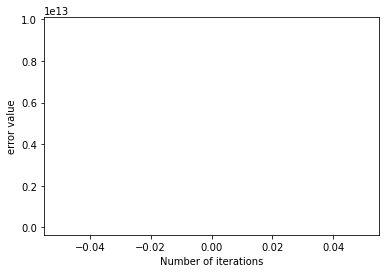

Evaluation for training data: 

Accuracy: 0.765862558280965
Precision: 0.0
Recall: 0.0


Evaluation for validation data: 

Accuracy: 0.7816558441558441
Precision: 0.0
Recall: 0.0


Evaluation for testing data: 

Accuracy: 0.7597402597402597
Precision: nan
Recall: 0.0


<ipython-input-47-8b548efc934a>:26: RuntimeWarning: overflow encountered in exp
  sig=1/(1+np.exp(-z))
<ipython-input-47-8b548efc934a>:161: RuntimeWarning: invalid value encountered in long_scalars
  precision = (y & y_hat).sum()/y_hat.sum()


In [48]:
test,valid,train=Kfold_generate(df_pca,1,2)
X_train, y_train, X_test, y_test, X_valid, y_valid=seperate_(train,test)
lr=logisticRegression(tolerance=0,learningRate=1e-4, X_train_lo=X_train,y_train_lo=y_train,X_test_lo=X_test,y_test_lo=y_test,X_valid_lo=X_valid,y_valid_lo=y_valid,maxIteration=100000)
lr.runModel()

#### 4.2.2 Train logistics regression with PCA of 95% variance ratio

  0%|          | 86/150000 [00:00<02:55, 856.07it/s]

Solving using gradient descent for training dataset


 20%|██        | 30273/150000 [00:20<01:21, 1463.32it/s]<ipython-input-47-8b548efc934a>:31: RuntimeWarning: overflow encountered in exp
  pred_ = np.log(np.ones(X.shape[0])+np.exp(X.dot(self.w)))-X.dot(self.w).dot(y)
 62%|██████▏   | 93428/150000 [01:04<00:39, 1445.82it/s]


The model Stopped - Converged


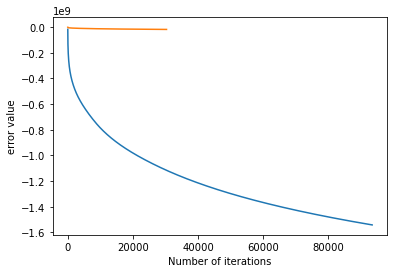

Evaluation for training data: 

Accuracy: 0.9998986418001217
Precision: 0.999345977763244
Recall: 1.0


Evaluation for validation data: 

Accuracy: 0.9951298701298701
Precision: 0.9791666666666666
Recall: 0.9894736842105263


Evaluation for testing data: 

Accuracy: 0.9991883116883117
Precision: 1.0
Recall: 0.9947368421052631


In [49]:
test,valid,train=Kfold_generate(df_pca_95,1,2)
X_train, y_train, X_test, y_test, X_valid, y_valid=seperate_(train,test)
lr=logisticRegression(tolerance=0,learningRate=1e-4, X_train_lo=X_train,y_train_lo=y_train,X_test_lo=X_test,y_test_lo=y_test,X_valid_lo=X_valid,y_valid_lo=y_valid,maxIteration=150000)
lr.runModel()

#### 4.2.2.1. Bias-Variance Trade off

It is model with relative low bias but high variance. The cost sequence even increases at the very beginning. However, the prediction rate in the validation set only drops a little compared to the training dataset. And the prediction rate in the test dataset gets higher prediction rate. So it could be said that it is a little overfitting. I think this may due to our dataset with low variety of features between instances.

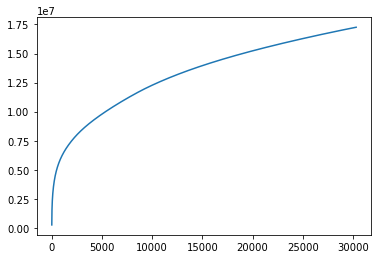

In [60]:
m=[-n for n in lr.valid_sequences]
plt.plot(m)

#### 4.2.3 Train logistics regression with PCA of 90% variance ratio

  0%|          | 264/100000 [00:00<01:12, 1372.94it/s]

Solving using gradient descent for training dataset


  4%|▍         | 3905/100000 [00:02<01:03, 1523.11it/s]<ipython-input-159-6307a5e478a1>:31: RuntimeWarning: overflow encountered in exp
  pred_ = np.log(np.ones(X.shape[0])+np.exp(X.dot(self.w)))-X.dot(self.w).dot(y)
 15%|█▍        | 14810/100000 [00:09<00:53, 1599.63it/s]


The model Stopped - Converged


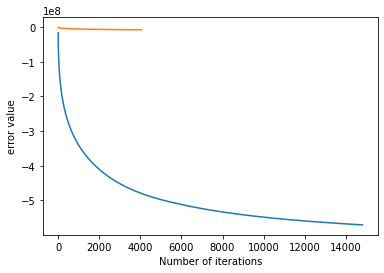

Evaluation for training data: 

Accuracy: 0.9795256436245692
Precision: 0.8850174216027874
Recall: 0.9973821989528796


Evaluation for testing data: 

Accuracy: 0.9935064935064936
Precision: 0.9642857142857143
Recall: 0.9947368421052631


In [169]:
test,valid,train=Kfold_generate(df_pca_90,1,2)
X_train, y_train, X_test, y_test, X_valid, y_valid=seperate_(train,test)
lr=logisticRegression(tolerance=0,learningRate=1e-4, maxIteration=100000, X_train_lo=X_train,y_train_lo=y_train,X_test_lo=X_test,y_test_lo=y_test,X_valid_lo=X_valid,y_valid_lo=y_valid)
lr.runModel()

#### 4.2.4 Train logistics regression with PCA of 80% variance ratio

  0%|          | 130/100000 [00:00<01:17, 1293.49it/s]

Solving using gradient descent for training dataset


 41%|████      | 40753/100000 [00:28<00:41, 1420.09it/s]


The model Stopped - Converged


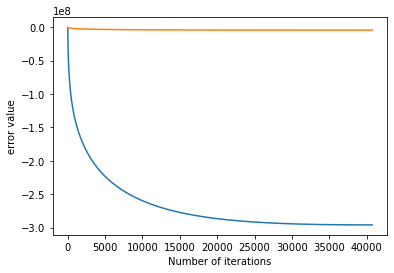

Evaluation for training data: 

Accuracy: 0.937563348874924
Precision: 0.7136832239925024
Recall: 0.9967277486910995


Evaluation for testing data: 

Accuracy: 0.961038961038961
Precision: 0.8008474576271186
Recall: 0.9947368421052631


In [171]:
test,valid,train=Kfold_generate(df_pca_80,1,2)
X_train, y_train, X_test, y_test, X_valid, y_valid=seperate_(train,test)
lr=logisticRegression(tolerance=0,learningRate=0.1e-4, maxIteration=100000, X_train_lo=X_train,y_train_lo=y_train,X_test_lo=X_test,y_test_lo=y_test,X_valid_lo=X_valid,y_valid_lo=y_valid,)
lr.runModel()

### 4.3 Train logistics regression using k-folds validation

Use Kfolds to train logistics regression

  0%|          | 96/150000 [00:00<02:38, 948.67it/s]



K-fold: 2

Solving using gradient descent for training dataset


  3%|▎         | 3953/150000 [00:02<01:46, 1377.36it/s]<ipython-input-159-6307a5e478a1>:31: RuntimeWarning: overflow encountered in exp
  pred_ = np.log(np.ones(X.shape[0])+np.exp(X.dot(self.w)))-X.dot(self.w).dot(y)
 10%|▉         | 14810/150000 [00:09<01:25, 1573.06it/s]

The model Stopped - Converged


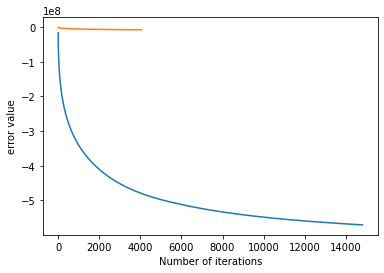

  0%|          | 136/150000 [00:00<01:51, 1349.96it/s]

Evaluation for training data: 

Accuracy: 0.9795256436245692
Precision: 0.8850174216027874
Recall: 0.9973821989528796


Evaluation for testing data: 

Accuracy: 0.9935064935064936
Precision: 0.9642857142857143
Recall: 0.9947368421052631


K-fold: 3

Solving using gradient descent for training dataset


100%|██████████| 150000/150000 [01:47<00:00, 1394.62it/s]


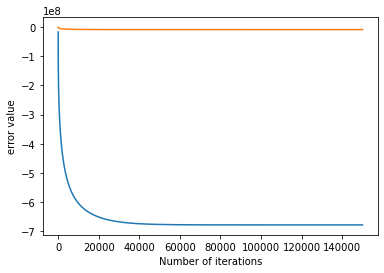

  0%|          | 134/150000 [00:00<01:52, 1333.43it/s]

Evaluation for training data: 

Accuracy: 0.9647273464423272
Precision: 0.8155080213903744
Recall: 0.9980366492146597


Evaluation for testing data: 

Accuracy: 0.9878246753246753
Precision: 0.9310344827586207
Recall: 0.9947368421052631


K-fold: 4

Solving using gradient descent for training dataset


100%|██████████| 150000/150000 [01:45<00:00, 1424.36it/s]


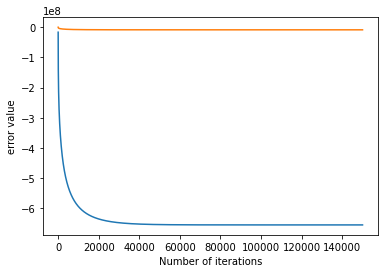

  0%|          | 75/150000 [00:00<03:22, 740.33it/s]

Evaluation for training data: 

Accuracy: 0.9681735252381918
Precision: 0.8309705561613958
Recall: 0.9973821989528796


Evaluation for testing data: 

Accuracy: 0.989448051948052
Precision: 0.9402985074626866
Recall: 0.9947368421052631


K-fold: 5

Solving using gradient descent for training dataset


100%|██████████| 150000/150000 [01:48<00:00, 1388.86it/s]


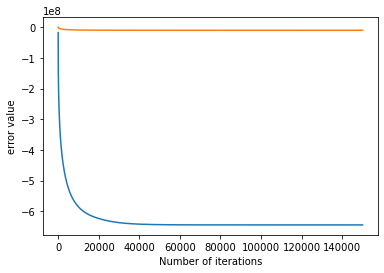

  0%|          | 138/150000 [00:00<01:49, 1372.39it/s]

Evaluation for training data: 

Accuracy: 0.9675653760389216
Precision: 0.8286180631120783
Recall: 0.9967277486910995


Evaluation for testing data: 

Accuracy: 0.9926948051948052
Precision: 0.9593908629441624
Recall: 0.9947368421052631


K-fold: 6

Solving using gradient descent for training dataset


100%|██████████| 150000/150000 [01:50<00:00, 1358.22it/s]


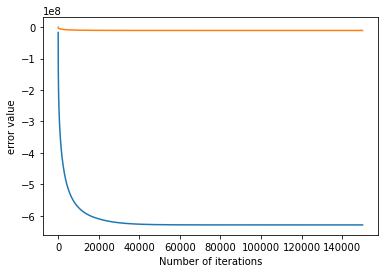

  0%|          | 115/150000 [00:00<02:11, 1142.23it/s]

Evaluation for training data: 

Accuracy: 0.9683762416379486
Precision: 0.83224043715847
Recall: 0.9967277486910995


Evaluation for testing data: 

Accuracy: 0.9926948051948052
Precision: 0.9593908629441624
Recall: 0.9947368421052631


K-fold: 7

Solving using gradient descent for training dataset


100%|██████████| 150000/150000 [01:47<00:00, 1389.46it/s]


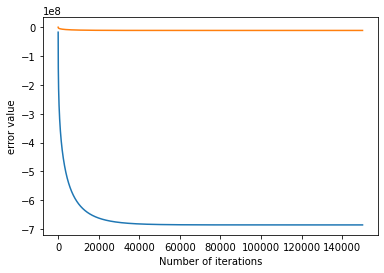

  0%|          | 126/150000 [00:00<01:59, 1249.70it/s]

Evaluation for training data: 

Accuracy: 0.9748631664301642
Precision: 0.862400906002265
Recall: 0.9967277486910995


Evaluation for testing data: 

Accuracy: 0.9935064935064936
Precision: 0.9642857142857143
Recall: 0.9947368421052631


K-fold: 8

Solving using gradient descent for training dataset


100%|██████████| 150000/150000 [01:55<00:00, 1294.50it/s]


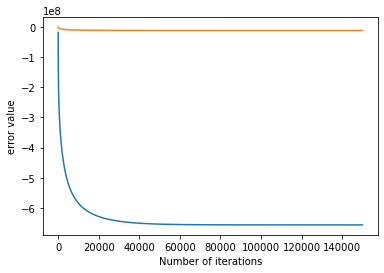

  0%|          | 108/150000 [00:00<02:19, 1077.85it/s]

Evaluation for training data: 

Accuracy: 0.9706061220352726
Precision: 0.8419889502762431
Recall: 0.9973821989528796


Evaluation for testing data: 

Accuracy: 0.9935064935064936
Precision: 0.9642857142857143
Recall: 0.9947368421052631


K-fold: 9

Solving using gradient descent for training dataset


100%|██████████| 150000/150000 [01:54<00:00, 1311.13it/s]


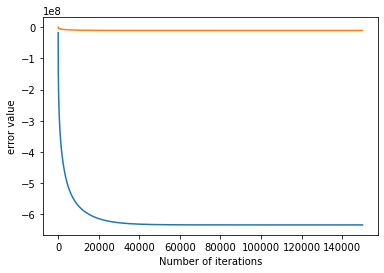

Evaluation for training data: 

Accuracy: 0.9697952564362456
Precision: 0.8382838283828383
Recall: 0.9973821989528796


Evaluation for testing data: 

Accuracy: 0.9926948051948052
Precision: 0.9593908629441624
Recall: 0.9947368421052631


In [176]:
for i in range(2,10):
    print('\n\nK-fold: {0}\n'.format(i))
    test,valid,train=Kfold_generate(df_pca_90,1,i)
    X_train, y_train, X_test, y_test, X_valid, y_valid=seperate_(train,test)
    lr=logisticRegression(tolerance=0,learningRate=1e-4, maxIteration=150000, X_train_lo=X_train,y_train_lo=y_train,X_test_lo=X_test,y_test_lo=y_test,X_valid_lo=X_valid,y_valid_lo=y_valid,)
    lr.runModel()

### 4.4 conclusion

Since the kfold 2 gets highest precision, we choose this model as our final model. And since there is no huge differnece between model with 95% variance ratio and 90% variance ratio while losing nearly 10% features, we plan to choose the one with 90% variance ratio. To get higher accuracy, we could always choose the one with 95% variance. 

## 5.SVM

### 5.1 Balance Dataset

Considering our dataset has values of target value (0 compared to 1) with 10442:1908, we need to balance it to get better training results using svm. So we need to make it 1908 :1908. So we take 1908 instances from 10442 randomly.

In [177]:
from scipy import optimize

In [178]:
df_pca_after=df_pca_95
df_pca_y1=df_pca_after[df_pca_after['Revenue']==1].sample(frac=1).reset_index(drop=True)
df_pca_y0=df_pca_after[df_pca_after['Revenue']==0].sample(frac=1).reset_index(drop=True)

In [179]:
df_pca_y0=df_pca_y0.iloc[:df_pca_y1.shape[0],:]

In [180]:
train=pd.concat([df_pca_y0.iloc[:400,:],df_pca_y1.iloc[:400,:]],axis=0).reset_index(drop=True)
test=pd.concat([df_pca_y0.iloc[400:600,:],df_pca_y1.iloc[400:600,:]],axis=0).reset_index(drop=True)
X_train=train.iloc[:,:-1].values
y_train=train.iloc[:,-1].values
X_test=test.iloc[:,:-1].values
y_test=test.iloc[:,-1].values  

Since our Dataset is not linearly sepeartable, we use 'rbf' kernel tricks to improve accuracy. Considering runing time problem, we only take 800 instances from 3816 to train the svm model

In [101]:
class SoftMarginSVM:
    
    def __init__(self, C,gamma=0.1):
        self.C=C
        self.beta=None
        self.supportVectors=None
        self.gamma=gamma
        
    def kernel(self,X,a):
        return np.exp(-self.gamma*np.linalg.norm(X-a)**2)
    
    def fit(self, X, y):
        
        n_samples=len(X)
        y_=np.where(y<=0, -1, 1)
        #y_i * y_j * (x_i^T*x_j) within the equation 7.32
        
        
        #用kernel替换X
        #Xy= X*y_[:,np.newaxis]#y只有1维，增加到两维
        #GramXy=np.matmul(Xy,Xy.T)
        
        GramXy=np.zeros([n_samples,n_samples])
        for i in range(n_samples):
            for j in range(n_samples):
                GramXy[i,j]=self.kernel(X[i],X[j])*y_[i]*y_[j]
                
        
        def Ld0(G, beta):
            return beta.sum() - 0.5* beta.dot(beta.dot(G)) # equation 7.32
        
        def partialDerivation(G, beta):
            #np.ones_like(beta) make derivation of beta to (1,1,1..)
            return np.ones_like(beta) - beta.dot(G)
        
        #Constraints on beta
        #equality ==> y.dot(beta)=0
        #inequalities ==> we have 2*N constraints (建立2N * N矩阵)
        #firt half for beta <= C and second half -beta <= 0
        
        
        beta = np.ones(n_samples) # initialize beta all to 1
        
        B=np.concatenate((np.zeros(n_samples),self.C*np.ones(n_samples)))
        A=np.vstack((-np.eye(n_samples),np.eye(n_samples)))
        
        constraints=({'type':'eq','fun': lambda beta_i:np.dot(beta_i,y_),'jac':lambda beta_i: y_}, #beta_i is the beta (lagrangian multiplier)
                     {'type':'ineq','fun': lambda beta_i: B-np.dot(A, beta_i), 'jac': lambda a:-A}# np.dot(A,beta_i) is to create -beta<=0 and beta<=C
                    )
        
        #dual lagrangian --> its a  maximizer
        optres = optimize.minimize(fun=lambda a: -Ld0(GramXy, a),
                                  x0= beta, 
                                  method='SLSQP',
                                  jac = lambda a: -partialDerivation(GramXy, a),
                                  constraints=constraints,
                                  options={ 'disp': True,
                                           'maxiter':10000})

        self.beta=optres.x
        
        epsilon=1e-3
        
        self.beta_support=self.beta[self.beta>epsilon]
        
        self.supportVectors=X[self.beta>epsilon]
        self.supportLabels=y_[self.beta>epsilon]
        
        n_samples=(self.supportVectors).shape[0]
        wx=np.zeros(n_samples)
        for i in range(n_samples):
            for beta, x_train, y_train in zip(self.beta_support,self.supportVectors,self.supportLabels):
                wx[i]+=beta*y_train*self.kernel(x_train,self.supportVectors[i])
        
        
        self.supportvectorsDistance=wx

        self.intercpt=-(np.min(self.supportvectorsDistance[self.supportLabels==1])+np.max(self.supportvectorsDistance[self.supportLabels==-1]))/2
    
    def evaluate(self, y, y_hat):
        y=(y==1)
        y_hat=(y_hat==1)
        
        accuracy = (y==y_hat).sum()/y.size
        precision = (y & y_hat).sum()/y_hat.sum()
        recall=(y&y_hat).sum()/y.sum()
        return accuracy, precision, recall
    
    def To_predict(self, X , y):
        n_samples=X.shape[0]
        self.approx=np.zeros(n_samples)
        self.prediction=np.zeros(n_samples)
        Gramxy=np.zeros(n_samples)
        for i in range(n_samples):
            for beta, x_train, y_train in zip(self.beta_support,self.supportVectors,self.supportLabels):
                Gramxy[i]+=beta*y_train*self.kernel(x_train,X[i])
        for i in range(X.shape[0]):
            self.approx[i]=Gramxy[i] + self.intercpt
            self.prediction[i]=np.sign(self.approx[i])
            
        self.target=np.where(y<=0,-1,1)
 
        
        accuracy_test, precision_test, recall_test= self.evaluate(self.target,self.prediction)
        
        print("Evaluation for training data: \n")
        print("Accuracy:", accuracy_test)
        print("Precision:", precision_test)
        print("Recall:", recall_test)

In [102]:
clf=SoftMarginSVM(C=10000,gamma=0.001)

In [103]:
clf.fit(X_train,y_train)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -13859.616392750071
            Iterations: 473
            Function evaluations: 474
            Gradient evaluations: 473


### 5.2 Prediction

#### 5.2.1. Prediction for training dataset

In [104]:
clf.To_predict(X_train,y_train)

Evaluation for training data: 

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


#### 5.2.2. Prediction for testing dataset

In [105]:
clf.To_predict(X_test,y_test)

Evaluation for training data: 

Accuracy: 0.96
Precision: 0.9742268041237113
Recall: 0.945


#### 5.2.3 Prediction for the remaining data in balanced dataset

In [145]:
test=pd.concat([df_pca_y0.iloc[400:,:],df_pca_y1.iloc[400:,:]],axis=0).reset_index(drop=True)
X_test_total=test.iloc[:,:-1].values
y_test_total=test.iloc[:,-1].values  

In [146]:
clf.To_predict(X_test_total,y_test_total)

Evaluation for training data: 

Accuracy: 0.9665119363395226
Precision: 0.975016880486158
Recall: 0.9575596816976127


#### 5.2.4 Prediction for all data in original dataset

In [144]:
clf.To_predict(df_pca_after.iloc[:,:-1].values,df_pca_after.iloc[:,-1].values)

Evaluation for training data: 

Accuracy: 0.9774533657745337
Precision: 0.8960155490767736
Recall: 0.9664570230607966


### 5.3 Conclusion

SVM is a very good model even with little training dataset. Though it takes a very long time, it gets relative high accuracy in different datasets